<a href="https://colab.research.google.com/github/Basu8971/Materraproject/blob/main/Models-%20Surfacetemp%20and%20ppt%20OLS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model for Quarter1ST:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     4.848
Date:                Tue, 21 Jan 2025   Prob (F-statistic):             0.0298
Time:                        12:52:55   Log-Likelihood:                -749.29
No. Observations:                 111   AIC:                             1503.
Df Residuals:                     109   BIC:                             1508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.3876    186.5

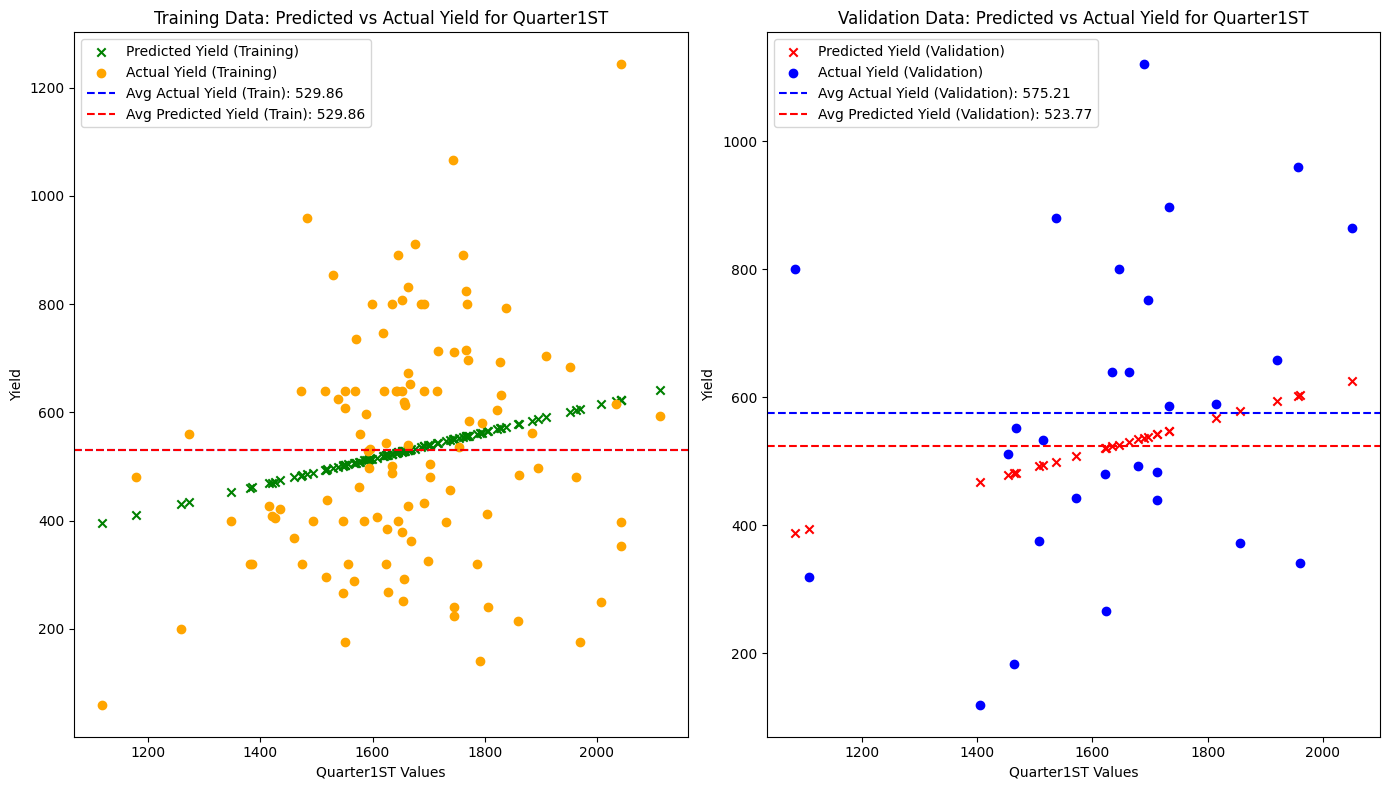

Model for Quarter2ST:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.476
Date:                Tue, 21 Jan 2025   Prob (F-statistic):              0.118
Time:                        12:52:55   Log-Likelihood:                -750.46
No. Observations:                 111   AIC:                             1505.
Df Residuals:                     109   BIC:                             1510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        245.5534    181.7

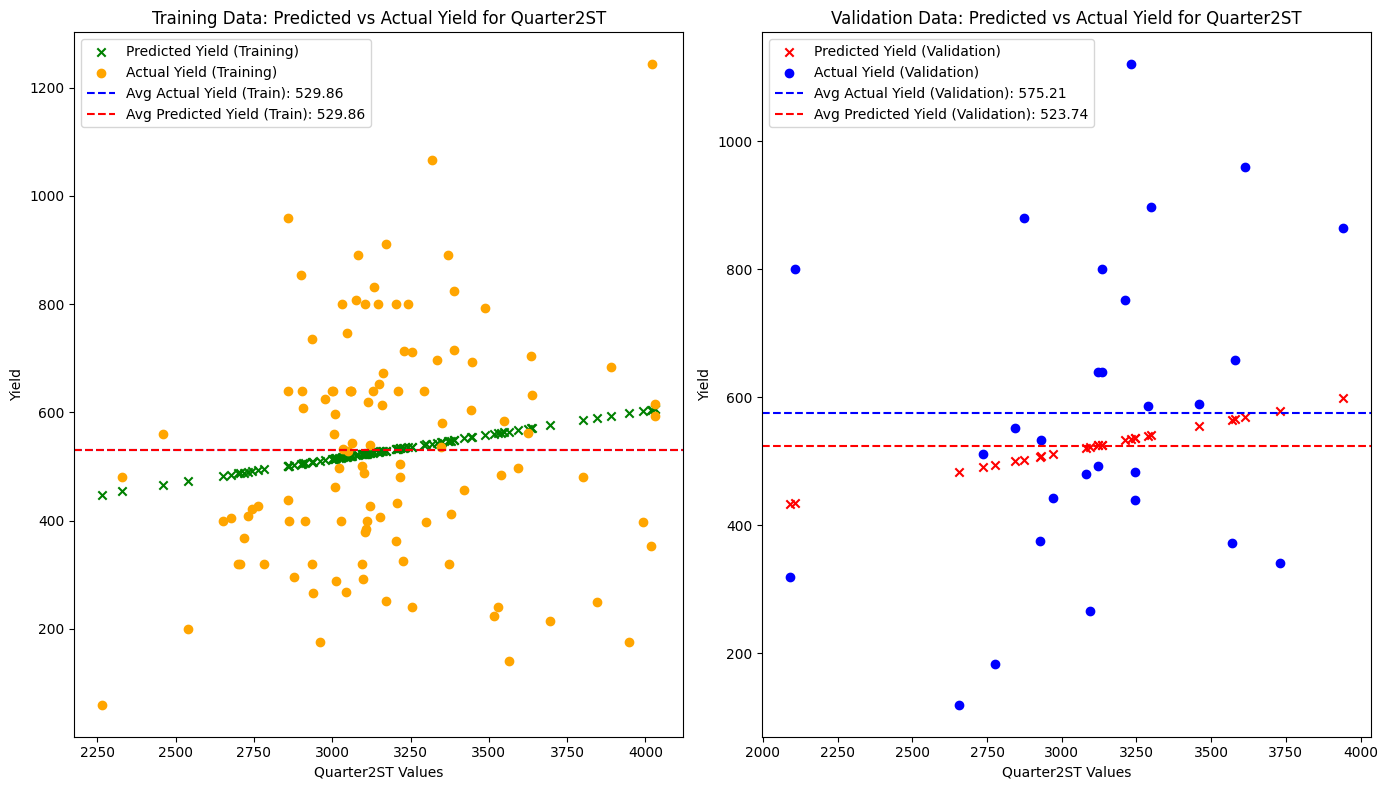

Model for CumulativeSurfacetemp:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.028
Date:                Tue, 21 Jan 2025   Prob (F-statistic):             0.0847
Time:                        12:52:56   Log-Likelihood:                -750.18
No. Observations:                 111   AIC:                             1504.
Df Residuals:                     109   BIC:                             1510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

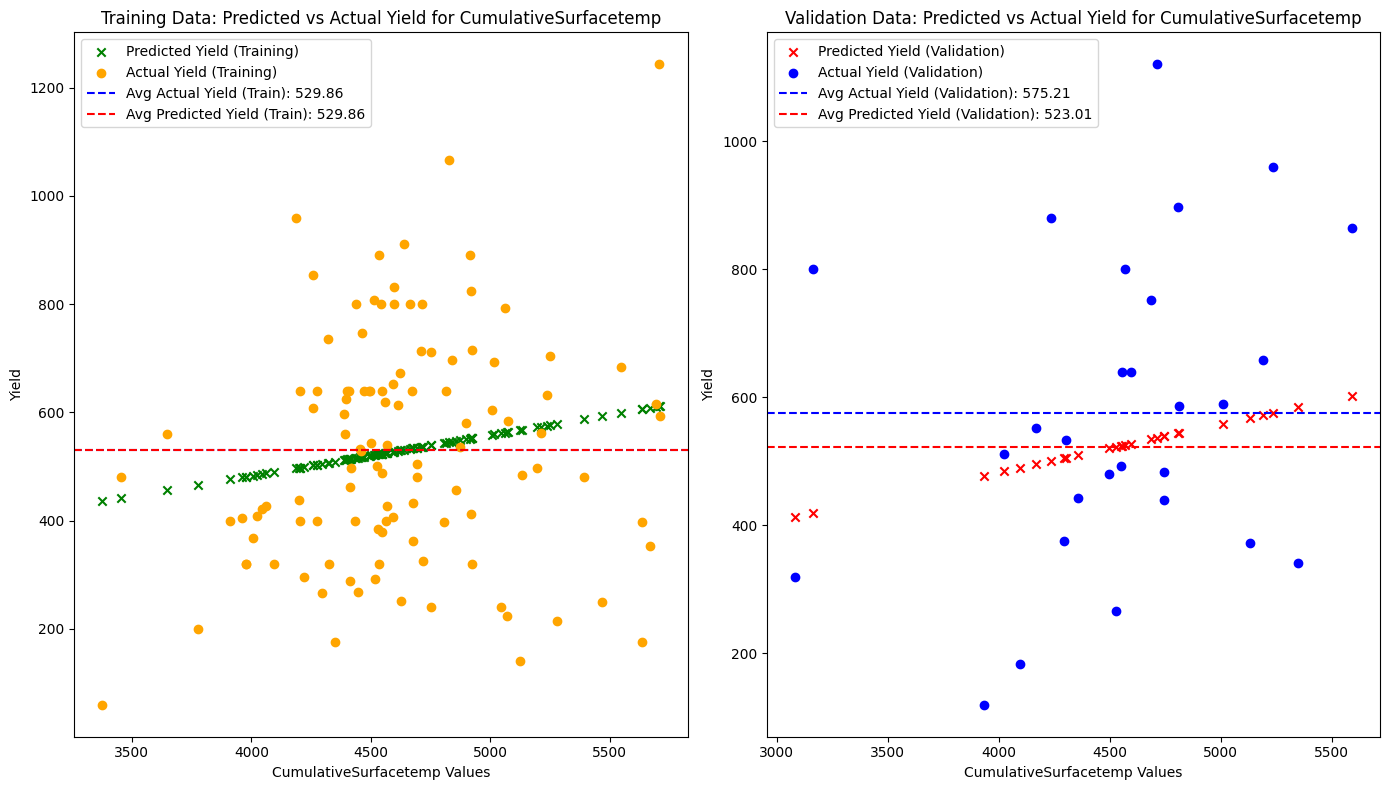

Model for Quarter1PPT:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.917
Date:                Tue, 21 Jan 2025   Prob (F-statistic):             0.0905
Time:                        12:52:56   Log-Likelihood:                -750.24
No. Observations:                 111   AIC:                             1504.
Df Residuals:                     109   BIC:                             1510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         637.8993     

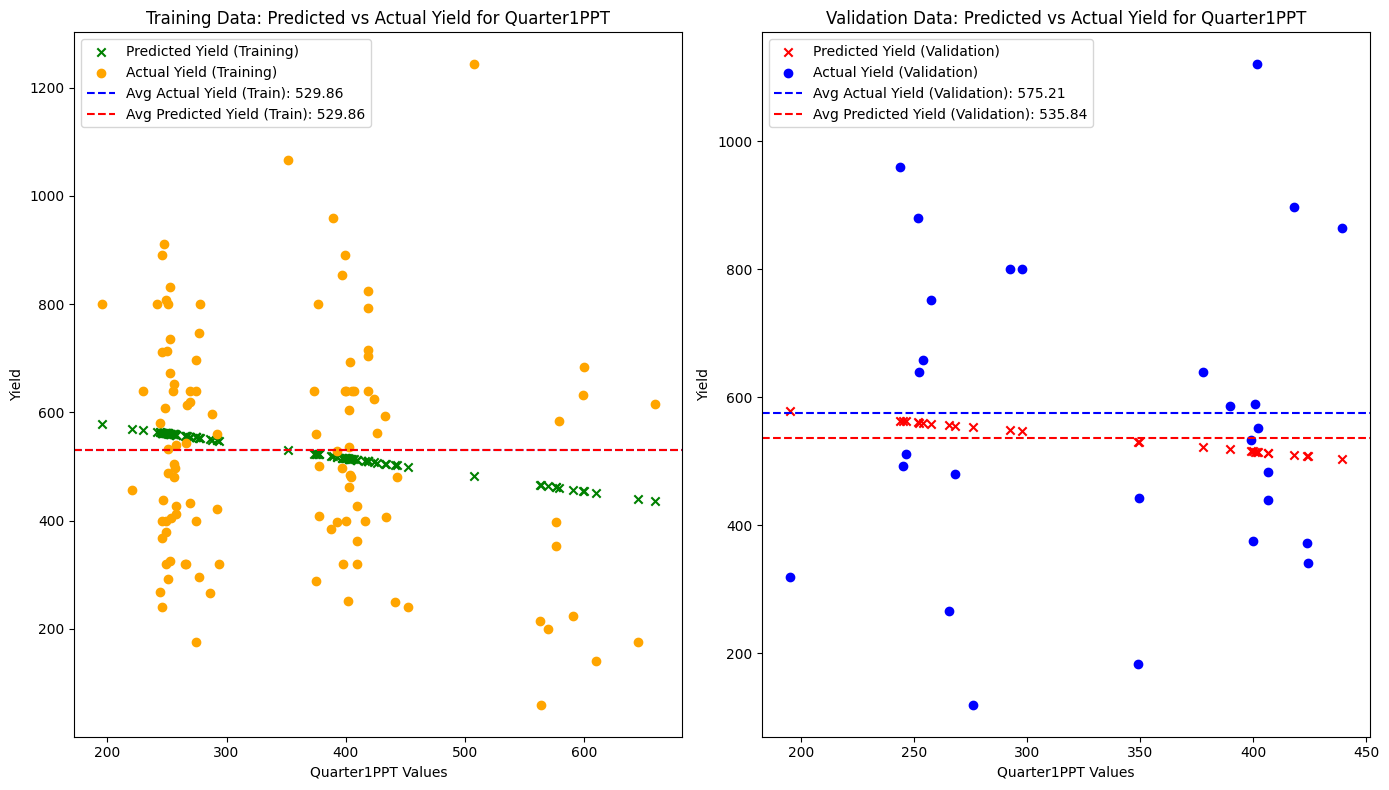

Model for Quarter2PPT:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5979
Date:                Tue, 21 Jan 2025   Prob (F-statistic):              0.441
Time:                        12:52:57   Log-Likelihood:                -751.40
No. Observations:                 111   AIC:                             1507.
Df Residuals:                     109   BIC:                             1512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         607.8918    1

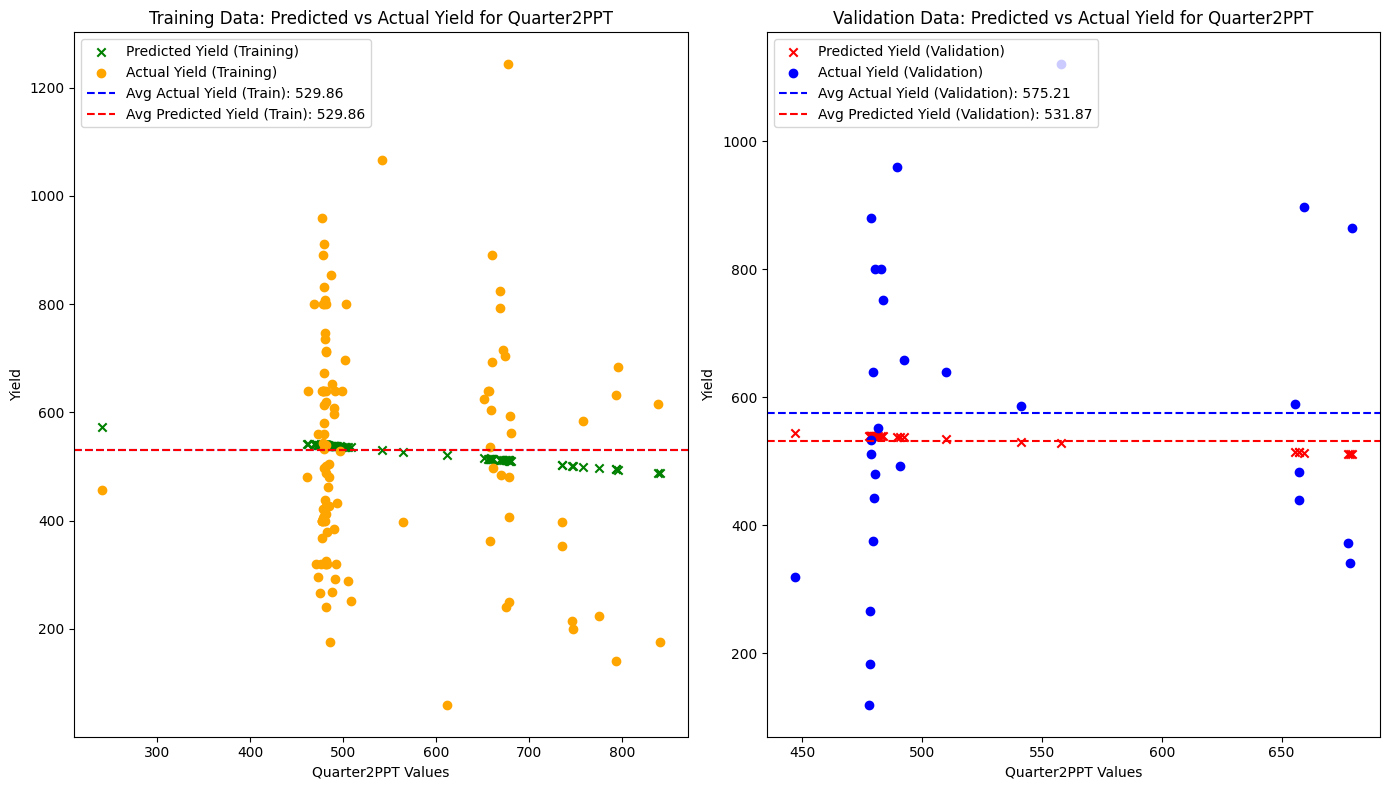

Model for CumulativePPT:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.343
Date:                Tue, 21 Jan 2025   Prob (F-statistic):              0.129
Time:                        12:52:58   Log-Likelihood:                -750.52
No. Observations:                 111   AIC:                             1505.
Df Residuals:                     109   BIC:                             1510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           870.1

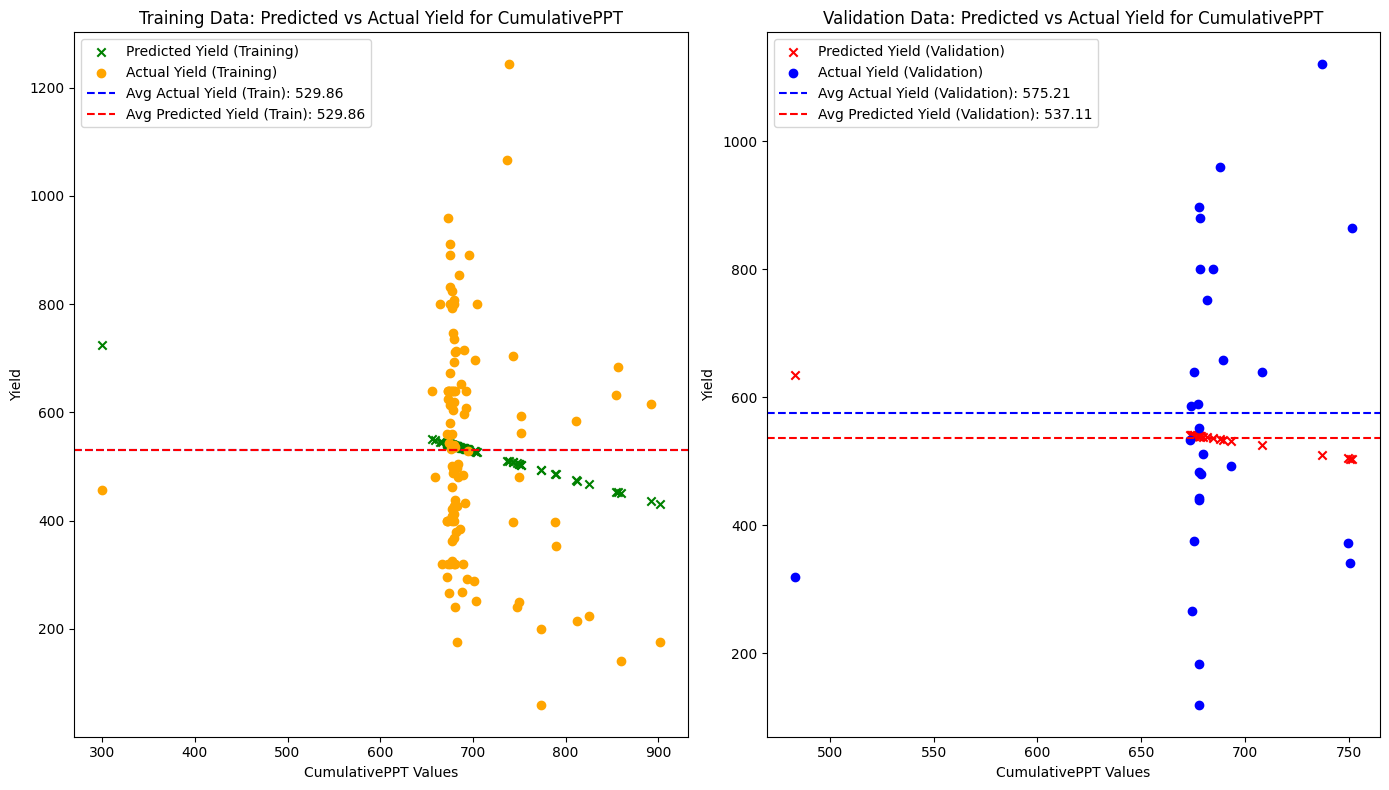

In [3]:
# Install necessary libraries (if not already installed)
!pip install --upgrade gspread google-auth pandas statsmodels scikit-learn matplotlib

# Authenticate and access Google Sheets
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Authenticate and authorize access to Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Access the yield data (CSV2) from the Google Sheets URL
yield_data_url = 'https://docs.google.com/spreadsheets/d/1306_u0hDxwOzAnAfghxXoam2lh6Pj10VIh8jBWU6ppU/edit?gid=1174240847#gid=1174240847'

# Open the sheet using gspread
yield_data_sheet = gc.open_by_url(yield_data_url)

# Fetch all data from the sheet
yield_data_raw = yield_data_sheet.sheet1.get_all_values()

# Convert the data to a pandas DataFrame
yield_data_df = pd.DataFrame(yield_data_raw[1:], columns=yield_data_raw[0])

# Clean up the column names (strip spaces, handle any formatting issues)
yield_data_df.columns = yield_data_df.columns.str.strip()  # Remove any leading/trailing spaces

# Convert relevant columns to appropriate types
yield_data_df['Yield'] = pd.to_numeric(yield_data_df['Yield'], errors='coerce')
yield_data_df['Quarter1ST'] = pd.to_numeric(yield_data_df['Quarter1ST'], errors='coerce')
yield_data_df['Quarter2ST'] = pd.to_numeric(yield_data_df['Quarter2ST'], errors='coerce')
yield_data_df['CumulativeSurfacetemp'] = pd.to_numeric(yield_data_df['CumulativeSurfacetemp'], errors='coerce')
yield_data_df['Quarter1PPT'] = pd.to_numeric(yield_data_df['Quarter1PPT'], errors='coerce')
yield_data_df['Quarter2PPT'] = pd.to_numeric(yield_data_df['Quarter2PPT'], errors='coerce')
yield_data_df['CumulativePPT'] = pd.to_numeric(yield_data_df['CumulativePPT'], errors='coerce')

# List of independent variables (meteorological variables)
independent_vars = ['Quarter1ST', 'Quarter2ST', 'CumulativeSurfacetemp',
                    'Quarter1PPT', 'Quarter2PPT', 'CumulativePPT']

# Function to create the OLS model, make predictions, and plot for both training and validation
def plot_ols_model(X_train, y_train, X_val, y_val, var, r2_val_train, r2_val):
    # Fit the OLS regression model
    ols_model = sm.OLS(y_train, X_train).fit()

    # Make predictions for training and validation
    y_train_pred = ols_model.predict(X_train)
    y_val_pred = ols_model.predict(X_val)

    # Calculate the average of actual and predicted yields for both training and validation
    avg_yield_train_actual = y_train.mean()
    avg_yield_train_pred = y_train_pred.mean()
    avg_yield_val_actual = y_val.mean()
    avg_yield_val_pred = y_val_pred.mean()

    # Plot Predicted Yield vs Actual Yield for Training
    plt.figure(figsize=(14, 8))

    # Training data graph
    plt.subplot(1, 2, 1)  # Subplot for training data
    plt.scatter(X_train[var], y_train_pred, color='green', label='Predicted Yield (Training)', marker='x')
    plt.scatter(X_train[var], y_train, color='orange', label='Actual Yield (Training)', marker='o')

    # Plot average actual and predicted yields for training
    plt.axhline(avg_yield_train_actual, color='blue', linestyle='--', label=f'Avg Actual Yield (Train): {avg_yield_train_actual:.2f}')
    plt.axhline(avg_yield_train_pred, color='red', linestyle='--', label=f'Avg Predicted Yield (Train): {avg_yield_train_pred:.2f}')

    # Add labels, title, and legend for training
    plt.xlabel(f'{var} Values')
    plt.ylabel('Yield')
    plt.title(f'Training Data: Predicted vs Actual Yield for {var}')
    plt.legend(loc='upper left')

    # Plot Predicted Yield vs Actual Yield for Validation
    plt.subplot(1, 2, 2)  # Subplot for validation data
    plt.scatter(X_val[var], y_val_pred, color='red', label='Predicted Yield (Validation)', marker='x')
    plt.scatter(X_val[var], y_val, color='blue', label='Actual Yield (Validation)', marker='o')

    # Plot average actual and predicted yields for validation
    plt.axhline(avg_yield_val_actual, color='blue', linestyle='--', label=f'Avg Actual Yield (Validation): {avg_yield_val_actual:.2f}')
    plt.axhline(avg_yield_val_pred, color='red', linestyle='--', label=f'Avg Predicted Yield (Validation): {avg_yield_val_pred:.2f}')

    # Add labels, title, and legend for validation
    plt.xlabel(f'{var} Values')
    plt.ylabel('Yield')
    plt.title(f'Validation Data: Predicted vs Actual Yield for {var}')
    plt.legend(loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Loop through each independent variable (meteorological variables) and build models
for var in independent_vars:
    # Define the independent variable and dependent variable
    X = yield_data_df[[var]]  # Single independent variable for each model
    y = yield_data_df['Yield']  # Dependent variable (Yield)

    # Split the data into training (80%) and validation (20%) sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Add a constant to the independent variables for the intercept in OLS
    X_train = sm.add_constant(X_train)  # Adds an intercept (constant) to the model
    X_val = sm.add_constant(X_val)

    # Fit the OLS regression model on the training data
    ols_model = sm.OLS(y_train, X_train).fit()

    # Make predictions on the training and validation data
    y_train_pred = ols_model.predict(X_train)
    y_val_pred = ols_model.predict(X_val)

    # Calculate R-squared for both the training and validation data
    r2_val_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)

    # Print the OLS model summary and R-squared for both training and validation
    print(f'Model for {var}:')
    print(ols_model.summary())
    print(f'R-squared (Training): {r2_val_train:.4f}')
    print(f'R-squared (Validation): {r2_val:.4f}')

    # Call the function to plot the results for both training and validation
    plot_ols_model(X_train, y_train, X_val, y_val, var, r2_val_train, r2_val)
